## Activity 6

In [21]:
import pandas as pd
import numpy as np

In [6]:
# loading data from a file using file exception handling

try:
    df = pd.read_csv('BL-Flickr-Images-Book.csv')
except Exception as e:
    print("File not found. Check your path or filename.")

#display results if file is found
df

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,4158088,NaN,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,NaN,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,NaN,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,NaN,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...


In [7]:
# columns before
df.columns

Index(['Identifier', 'Edition Statement', 'Place of Publication',
       'Date of Publication', 'Publisher', 'Title', 'Author', 'Contributors',
       'Corporate Author', 'Corporate Contributors', 'Former owner',
       'Engraver', 'Issuance type', 'Flickr URL', 'Shelfmarks'],
      dtype='object')

In [8]:
# Dropping unwanted columns

# specify multiple
drop_cols = ['Edition Statement', 'Corporate Author', 'Corporate Contributors', 'Former owner', 'Engraver', 'Contributors', 'Issuance type', 'Shelfmarks']

df.drop(drop_cols, inplace=True,  axis=1)

# columns after
df.columns

Index(['Identifier', 'Place of Publication', 'Date of Publication',
       'Publisher', 'Title', 'Author', 'Flickr URL'],
      dtype='object')

In [9]:
# changing indices for Identifier

# confirm that Identifier column is unique
print(df['Identifier'].is_unique)

df.set_index('Identifier', inplace=True)
df.head()

True


,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [19]:
# Handling duplicate data

# first check to see if duplicates exist
duplicates = df[df.duplicated()]
duplicates

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,


In [23]:
# Tidying the fields in dataset & combining string methods with NumPy to clean columns

df.dtypes

Place of Publication    object
Date of Publication     object
Publisher               object
Title                   object
Author                  object
Flickr URL              object
dtype: object

In [25]:
df.loc[1900:, 'Date of Publication']

Identifier
1905              1888
1929       1839, 38-54
2836              1897
2854              1865
2956           1860-63
              ...     
4158088           1838
4158128       1831, 32
4159563      [1806]-22
4159587           1834
4160339        1834-43
Name: Date of Publication, Length: 8275, dtype: object

In [32]:
import re
pattern = r'^(\d{4})'
extr = df['Date of Publication'].str.extract(pattern, expand=False)
extr

Identifier
206        1879
216        1868
218        1869
472        1851
480        1857
           ... 
4158088    1838
4158128    1831
4159563     NaN
4159587    1834
4160339    1834
Name: Date of Publication, Length: 8287, dtype: object

In [34]:
df['Date of Publication'] = pd.to_numeric(extr)
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879.0,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [38]:
# Handling missing values

df.isnull().sum() # counts number of null for each column

Place of Publication       0
Date of Publication      971
Publisher               4195
Title                      0
Author                  1778
Flickr URL                 0
dtype: int64

In [40]:
# see how many records we have
df.shape

# note we have:
#    - 4195 publishers missing out of 8287 records
#    - 971 missing publishers of 8287 records
#    - 1778 missing authors of 8287 records

(8287, 6)

In [42]:
# dealing with outliers

# can use IQR :
# - compute Q1 & Q3
# - IQR = Q3 - Q1
# - LowerUpper bound = Q3 +/-1.5*Q1

# or use Zscore:
# - zscore(x) is > or < 3 => x is an outlier

derm_df = pd.read_csv('dermatology_database_1.csv')
derm_df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [44]:
derm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

<Axes: >

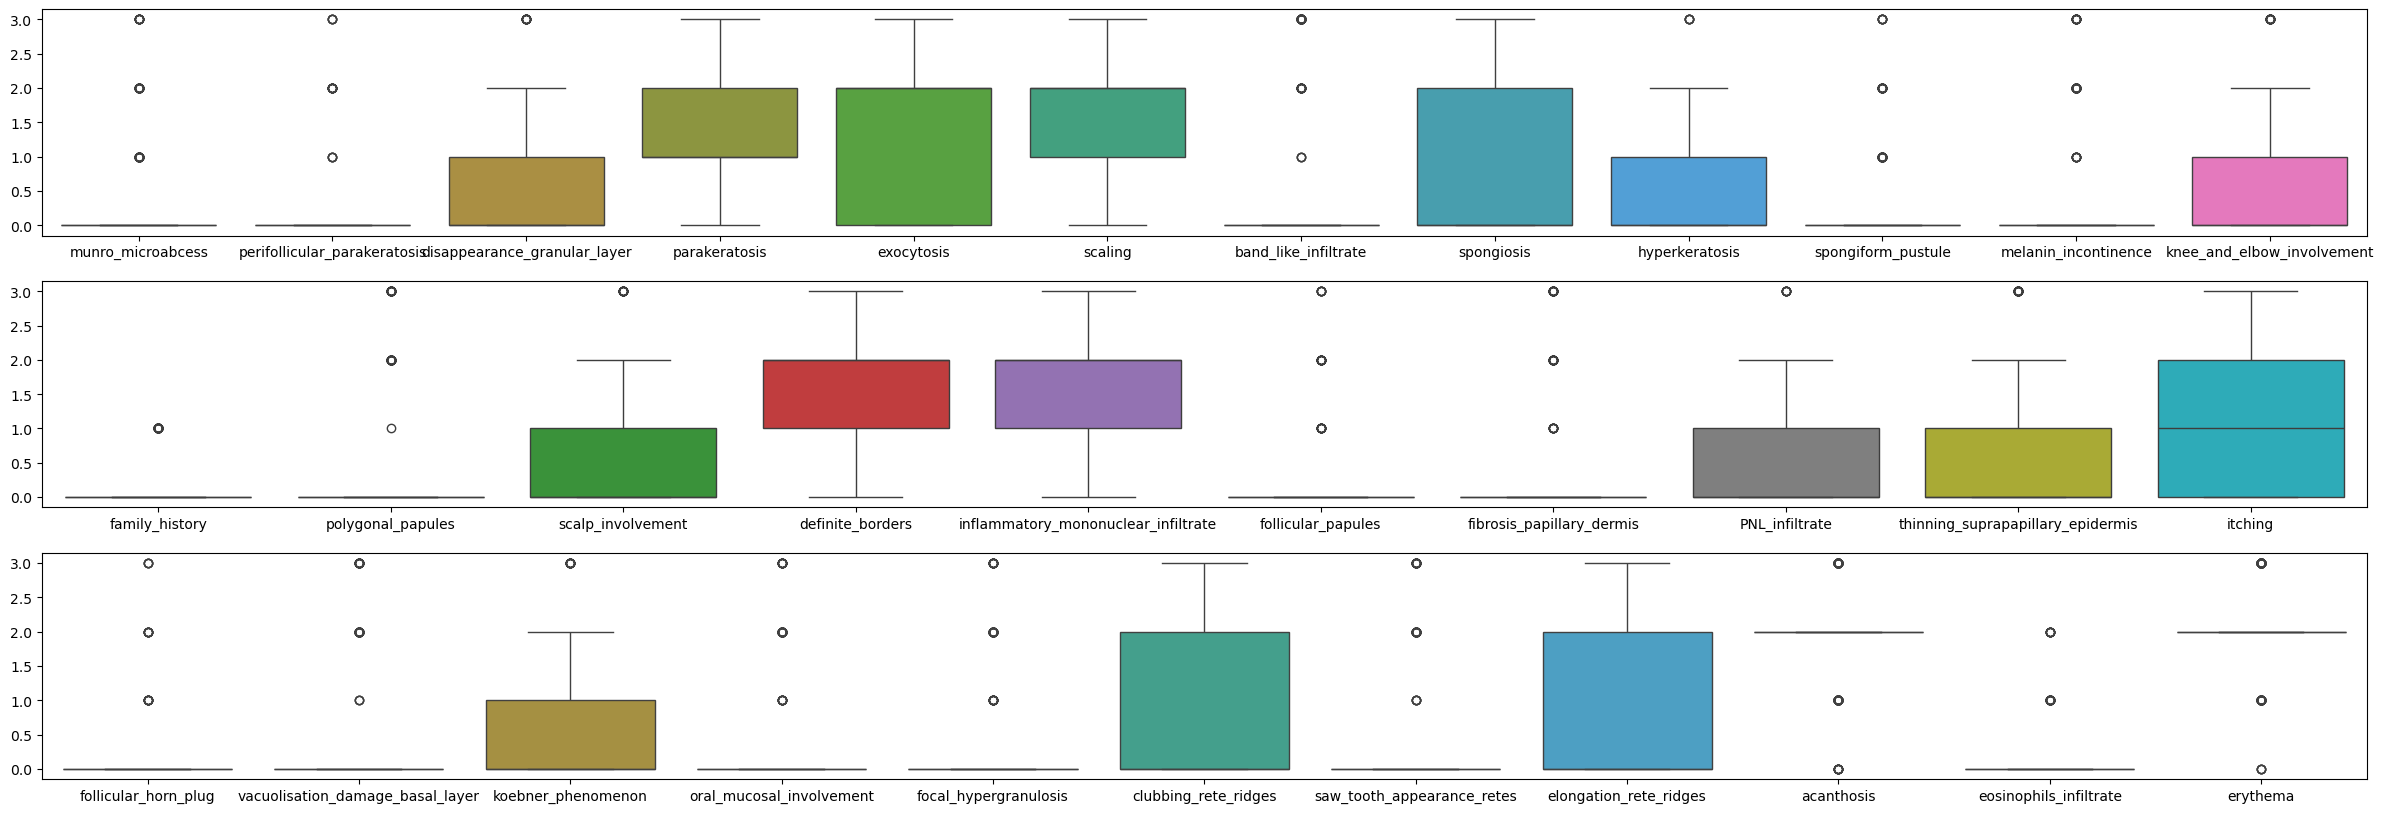

In [50]:
# visualizing the outliers
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows = 3, figsize=(30,10))
target = ['class']
predictors = list(set(derm_df.columns) - set(target))

# split the predictors into 3 groups
predictors_1, predictors_2, predictors_3 = [predictors[i::3] for i in range(3)]

sns.boxplot(ax=axs[0], data=derm_df[predictors_1])
sns.boxplot(ax=axs[1], data=derm_df[predictors_2])
sns.boxplot(ax=axs[2], data=derm_df[predictors_3])

# we can see outliers as dots above & below each bar's upper/lower limits